# **ERIS CORBAXHI TASK 1 - SOLUTIONS**

In [ ]:
# Importing libraries

import pandas as pd

In [ ]:
# Read the data file into Python as a pandas data frame
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# a. [5pt] Create a subset of data which only contains selected variables.
# This should be a new Python variable only containing selected columns.

df_analysis = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]


In [ ]:
# b. [10pt] For each variable, please check whether it has any missing values.
# If yes, how many missing values are there.

for column in df_analysis.columns:
  missing_values = df_analysis[column].isnull().sum()
  if missing_values > 0:
    print(f"Variable '{column}' has {missing_values} missing values.")
  else:
    print(f"Variable '{column}' has no missing values.")


Variable 'Survived' has no missing values.
Variable 'Pclass' has no missing values.
Variable 'Sex' has no missing values.
Variable 'Age' has 177 missing values.
Variable 'Fare' has no missing values.
Variable 'Embarked' has 2 missing values.


In [ ]:
# c. [10pt] If you see missing values on variables Survived, Pclass, Sex, Embarked, please removing the missing records.


# Remove rows with missing values in 'Embarked'
df_analysis = df_analysis.dropna(subset=['Embarked'])



In [ ]:
# d. [10pt] For missing values on variables Age, Fare, please replace the missing value using average age and average fare.
# df_analysis = df_analysis.dropna(subset=['Embarked'])

# Calculate the average age and fare
average_age = df_analysis['Age'].mean()

# Fill missing values in 'Age' with the average age
df_analysis = df_analysis.assign(Age=df_analysis['Age'].fillna(average_age))



In [ ]:
# e. [10pt] If you identify any categorical variable(s), please use one-hot encoding to convert the variables.

# Identify categorical variables
categorical_variables = ['Sex', 'Embarked']

# Apply one-hot encoding to categorical variables
df_analysis = pd.get_dummies(df_analysis, columns=categorical_variables, dummy_na=False)


In [ ]:
# f. [5pt] prompt: At the end, please print the final dataset, which only contains selected variable and is well cleaned. Please indicate the number of observations in the dataset.
# df_analysis = pd.get_dummies(df_analysis, columns=categorical_variables, dummy_na=False)

print(df_analysis)
print(f"Number of observations in the dataset: {len(df_analysis)}")


     Survived  Pclass        Age     Fare  Sex_female  Sex_male  Embarked_C  \
0           0       3  22.000000   7.2500       False      True       False   
1           1       1  38.000000  71.2833        True     False        True   
2           1       3  26.000000   7.9250        True     False       False   
3           1       1  35.000000  53.1000        True     False       False   
4           0       3  35.000000   8.0500       False      True       False   
..        ...     ...        ...      ...         ...       ...         ...   
886         0       2  27.000000  13.0000       False      True       False   
887         1       1  19.000000  30.0000        True     False       False   
888         0       3  29.642093  23.4500        True     False       False   
889         1       1  26.000000  30.0000       False      True        True   
890         0       3  32.000000   7.7500       False      True       False   

     Embarked_Q  Embarked_S  
0         False      

# **ERIS CORBAXHI TASK 2 - SOLUTIONS**#

In [ ]:
# a. [5pt] Print the descriptive statistics table using all numerical variables

numerical_variables = ['Survived', 'Pclass', 'Age', 'Fare']
df_numerical = df_analysis[numerical_variables]
print(df_numerical.describe())


         Survived      Pclass         Age        Fare
count  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.642093   32.096681
std      0.486260    0.834700   12.968346   49.697504
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000    2.000000   22.000000    7.895800
50%      0.000000    3.000000   29.642093   14.454200
75%      1.000000    3.000000   35.000000   31.000000
max      1.000000    3.000000   80.000000  512.329200


In [ ]:
# b. [5pt] Print the correlation matrix using numerical variables.

print(df_numerical.corr())


          Survived    Pclass       Age      Fare
Survived  1.000000 -0.335549 -0.074513  0.255290
Pclass   -0.335549  1.000000 -0.328256 -0.548193
Age      -0.074513 -0.328256  1.000000  0.088780
Fare      0.255290 -0.548193  0.088780  1.000000


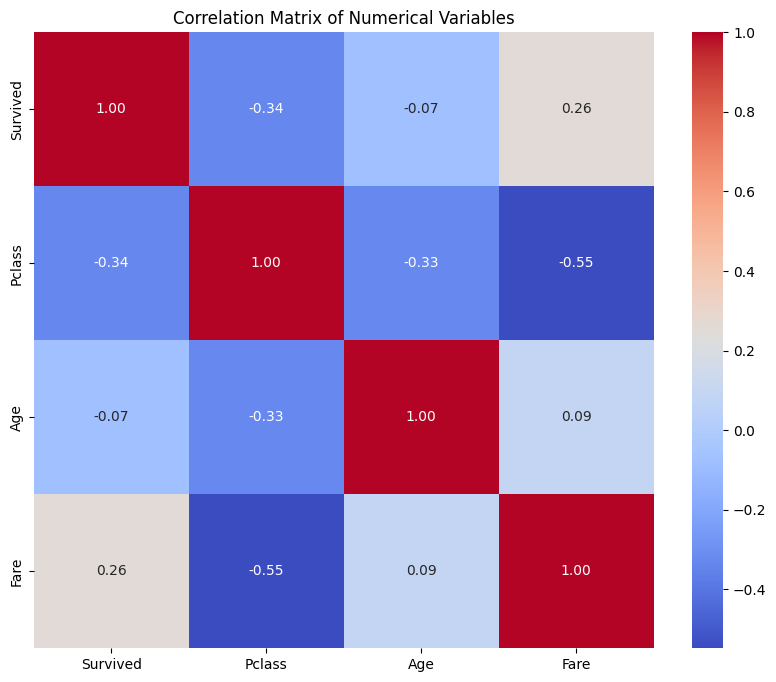

In [ ]:
# b.2 Visualization of the above matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [ ]:
# c. [5pt] Pick one categorical varaible and print the frequency table.
 # (Note: the frequency table should include the label of each category and the number of observations in each category)

# Select a categorical variable (e.g., 'Pclass')
categorical_variable = 'Pclass'

# Calculate the frequency table
frequency_table = df_analysis[categorical_variable].value_counts()

# Print the frequency table
print(frequency_table)


Pclass
3    491
1    214
2    184
Name: count, dtype: int64


# **ERIS CORBAXHI TASK 3 - SOLUTIONS**#

In [ ]:
# 1. [25pt] Please build a linear regression model and run the analysis using Fare as dependent varaible, and others are independent variables. In the result, you should see:
# The coefficient for each independent variable and the significant level
# The R-squared for the model.
# Number of observations you used to run the analysis.

import statsmodels.formula.api as sm

# Define the formula for the linear regression model
formula = 'Fare ~ Survived + Pclass + Age'

# Fit the linear regression model
model = sm.ols(formula, data=df_analysis).fit()

# Print the model summary
print(model.summary())

# Get the number of observations used in the analysis
n_observations = len(df_analysis)
print(f"Number of observations: {n_observations}")


                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     134.4
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           9.06e-72
Time:                        16:02:24   Log-Likelihood:                -4566.4
No. Observations:                 889   AIC:                             9141.
Df Residuals:                     885   BIC:                             9160.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.4678      7.163     16.261      0.0

In [40]:
# 2. [10pt] Based on your result, which factor(s) significantly affect ticket fare and is there a negative or positive relationship? (You can add a text block writing your answer)

print("Based on the linear regression model summary, the following factors significantly affect ticket fare:")



"""
Survived (coef = 6.3158, p = 0.041):

There is a positive relationship: Passengers who survived paid, on average, 6.32 units more in fare than those who did not survive. This factor is statistically important (p < 0.05), meaning it has a meaningful impact on fare.

Pclass (coef = -33.1515, p = 0.000):

There is also a negative relationship: For each increase in Pclass (e.g., from 1st class to 2nd or 3rd class), the fare decreases by 33.15 units on average. This is the most significant factor (p < 0.0001) influencing fare.
The higher the class (lower number), the higher the fare, and vice versa.

Age (coef = -0.3426, p = 0.003):

We have a negative relationship: Each additional year of age leads to a slight decrease in fare of 0.34 units. While the effect is small, it is statistically significant (p < 0.01).

In conclusion:
Pclass has the strongest and most significant negative relationship with fare. Higher-class passengers pay more.
Survived has a significant positive relationship, where survivors generally paid more in fare.
Age has a small but significant negative relationship, with older passengers paying slightly less on average.
All of these factors significantly affect fare, with Pclass having the largest impact.

"""


Based on the linear regression model summary, the following factors significantly affect ticket fare:


'\nSurvived (coef = 6.3158, p = 0.041):\n\nPositive relationship: Passengers who survived paid, on average, 6.32 units more in fare than those who did not survive. This factor is statistically significant (p < 0.05), meaning it has a meaningful impact on fare.\nPclass (coef = -33.1515, p = 0.000):\n\nNegative relationship: For each increase in Pclass (e.g., from 1st class to 2nd or 3rd class), the fare decreases by 33.15 units on average. This is the most significant factor (p < 0.0001) influencing fare. The higher the class (lower number), the higher the fare, and vice versa.\nAge (coef = -0.3426, p = 0.003):\n\nNegative relationship: Each additional year of age leads to a slight decrease in fare of 0.34 units. While the effect is small, it is statistically significant (p < 0.01).\nSummary:\nPclass has the strongest and most significant negative relationship with fare. Higher-class passengers pay substantially more.\nSurvived has a significant positive relationship, where survivors ge